In [60]:
import requests
import json
import pandas as pd
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
% matplotlib inline
head="https://graph.facebook.com/v2.12/"
whoandtime="1498922743698823/posts?limit=5&since=2017-12-01&until=2017-12-31&access_token="
token="EAACEdEose0cBANqdcgGasif46aZC1ZBZAfqohnK9W4DgWBlaiSaRxVpZBffIl5SxIRyz9ETRlOWWh6IZC43TDg5oColvZClIS1QpfEeOGdubZCxEx9YvZC3vtH21kAIMPGAaMCw7je1k8nnQFuickP8CV3nKudXX2l64UQYphOctuQWxPxfUik0kYRMY41uSKdz0QaeTpKR9gQZDZD"
url = head+whoandtime+token

#url1 = "https://graph.facebook.com/v2.12/1498922743698823/posts?since=2017-12-20&until=2017-12-31&limit=20&access_token=EAACEdEose0cBAGYk1eQgDwmOdZCbwmJdZBzh0MCqZBIca0vLISgbbZAgqgCkoXu9BKeMeb9TbLhpX8DqVbL3WyY4pDZCQoZBivWuIJe5HeTchWy7P2TrE0u81ZCBAnZCJn2xnTuCgeTRXPr4ZAwQ2MGN6t9AVdHYSksaWZCYleNQoAGBll5ZAnmhaM6PCRp0I3GgyZCHbaANcVoe7gZDZD"

*爬取12/01~12/31的91APP臉書

In [61]:
response = requests.get(url)
html = json.loads(response.text) 
html

{'data': [{'created_time': '2017-12-29T13:00:00+0000',
   'id': '1498922743698823_2027662857491473',
   'message': '✨2018年依舊會是創作者大放異彩的一年!!!'},
  {'created_time': '2017-12-29T04:32:29+0000',
   'id': '1498922743698823_2027524624171963',
   'message': '✨影片已成為2018數位行銷主戰場。'},
  {'created_time': '2017-12-28T14:04:30+0000',
   'id': '1498922743698823_2027216010869491',
   'message': '【91嚴選!】aPure，人間的臭腳終結者。\n看看一家從解決老闆自身腳臭問題起家，\n一步一腳印，走過13年市場變化，\n最終成為台灣臭腳終結者的故事。'},
  {'created_time': '2017-12-27T04:05:42+0000',
   'id': '1498922743698823_2026581374266288',
   'message': '✨2017年大家都在Google什麼？',
   'story': "91APP 品牌新零售 shared 廣告裁判's video."},
  {'created_time': '2017-12-26T13:31:01+0000',
   'id': '1498922743698823_2026283177629441',
   'message': '✨連攝影師也要加入AI失業大軍的行列了是否？'}],
 'paging': {'cursors': {'after': 'Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5VXhORGs0T1RJeU56UXpOams0T0RJek9pMDFOelF3T1RnMU1UVTFPREl3TVRFNE5UVXlEd3hoY0dsZAmMzUnZAjbmxmYVdRUElURTBPVGc1TWpJM05ETTJPVGc0TWpOZAk1qQXlOakk0TXpFM056WXl

In [62]:
nextflg= html['paging']['next']
after  = html['paging']['cursors']['after']
s1 = pd.DataFrame.from_dict(html['data'])
filename = "1"+".txt"
s1.to_csv(filename, sep='\t', index=False)

In [63]:
count=1
while nextflg != None:  
  count=count+1
  attrs  = "1498922743698823/posts?pretty=0&since=2017-12-01&until=2017-12-31&limit=20&after="+after+"&access_token="  
  url = head+attrs+token
  response = requests.get(url)
  html = json.loads(response.text) 
  s1 = pd.DataFrame.from_dict(html['data'])
  filename = str(count)+".txt"
  s1.to_csv(filename, sep='\t', index=False)
  after  = html['paging']['cursors']['after']
  try:
      nextflg = html['paging']['next']
  except:
      nextflg = None

 

In [73]:
sum=""
files=['1.txt','2.txt','3.txt']
for i in files:
    file = pd.read_csv(i,header = 0,sep = "\t")
    f = file['message']
    #把null弄掉
    f = f[f.notnull()]
    for item in f:
        sum += item
print(sum)
       
    

✨2018年依舊會是創作者大放異彩的一年!!!✨影片已成為2018數位行銷主戰場。【91嚴選!】aPure，人間的臭腳終結者。
看看一家從解決老闆自身腳臭問題起家，
一步一腳印，走過13年市場變化，
最終成為台灣臭腳終結者的故事。✨2017年大家都在Google什麼？✨連攝影師也要加入AI失業大軍的行列了是否？#91APP新零售開店系統 #全台老闆持續關注
2018說明會登場!!!
想要把握零售商機，
在新的一年拔得頭籌？
趕快報名了解>> goo.gl/kxcm3q

✓在說明會中，你可以知道：
1.如何一鍵按下讓粉絲團一秒變商店
2.如何用91APP系統快速切入新零售
3.專業顧問一對一解答開店疑難雜症✨時薪4500元欸，看到小編瞳孔都放大惹✨最強廣告大集結，每則都讓人印象深刻。今天就是平安夜了!!!
不知大家這個聖誕周末是怎麼度過的呢？
上星期五 #91APP福委會 舉辦了「松果聖誕樹DIY」活動
我們除了手做自己獨一無二的聖誕樹外，
也開放票選「最美的松果聖誕樹」，
下面這幾棵樹，就是經大家票選，
一致公認最美的前十名!!!
(好拉第八名是有點黑人問號)

在這個關於愛與分享的夜晚，
祝福所有人，聖誕節快樂，
也希望大家明天都能帶著好心情上班!!!✨企業要在新零售時代找到新商機，抓住消費者的心，行銷策略與行銷工具也必須跟著調整因應。【91嚴選!每周一店】
「拼圖可以有很多想像！它也可以是藝術、文化、童趣...」
拼圖總動員於2015年2月開始營運，
進口日本及、美品牌拼圖，擁有款式豐富及最新的商品！
 
除了販售及進口各國拼圖之外，
拼圖總動員最重要的目標是將台灣的人文風景推向國際，
用拼圖拼湊出作品裡凝聚的情感，
讓拼圖掀起生活中的動人樂章！
 
讓雙眼藉由拼圖，看見不一樣的世界。
拼圖總動員官方網站  >>  goo.gl/5k6fWb
免費參加開店說明會  >>  goo.gl/kxcm3q✨零售商應謹記，男性和女性購物者的差異不僅體現在購買的物品上，他們購物的方式也不一樣。✨醜照再見。2018年，零售業主誰能將AI與銷售結合，誰就是贏家。✨Facebook出手打擊「觸及率誘餌」，以後別再認同請分享了!✨這棟龐然大物是汽車自動販賣機。對，賣汽車的。
#深度體驗是消費者做購買決策中重要一環#開店專家告訴你 #說明會現場直擊
最新零售趨勢是什麼？智慧零售哪

抓出message的部分

In [82]:
stopwords = ['你','\n','的','也','是','在','讓','都','了','有','與']
puncs = '✨！？｡"#+＃＄％＆＇>（）＊＋，－／!：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [83]:
seg_list = jieba.cut(sum, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: ✨/ 2018/ 年/ 依舊/ 會/ 是/ 創/ 作者/ 大放/ 異彩/ 的/ 一年/ !/ !/ !/ ✨/ 影片/ 已成/ 為/ 2018/ 數位/ 行銷/ 主戰場/ 。/ 【/ 91/ 嚴選/ !/ 】/ aPure/ ，/ 人間/ 的/ 臭/ 腳終/ 結者/ 。/ 
/ 看看/ 一家/ 從/ 解決/ 老/ 闆/ 自身/ 腳臭/ 問題/ 起家/ ，/ 
/ 一步/ 一腳/ 印/ ，/ 走過/ 13/ 年/ 市場/ 變化/ ，/ 
/ 最終/ 成為/ 台灣/ 臭/ 腳終/ 結者/ 的/ 故事/ 。/ ✨/ 2017/ 年/ 大家/ 都/ 在/ Google/ 什麼/ ？/ ✨/ 連攝/ 影師/ 也/ 要/ 加入/ AI/ 失業/ 大/ 軍/ 的/ 行列/ 了/ 是否/ ？/ #/ 91APP/ 新/ 零售/ 開店/ 系統/  / #/ 全台/ 老/ 闆/ 持續/ 關注/ 
/ 2018/ 說/ 明會/ 登場/ !/ !/ !/ 
/ 想要/ 把握/ 零售商/ 機/ ，/ 
/ 在/ 新/ 的/ 一年/ 拔得頭/ 籌/ ？/ 
/ 趕快/ 報名/ 了解/ >/ >/  / goo/ ./ gl/ // kxcm3q/ 
/ 
/ ✓/ 在/ 說/ 明會/ 中/ ，/ 你/ 可以/ 知道/ ：/ 
/ 1/ ./ 如何/ 一鍵/ 按/ 下/ 讓/ 粉絲團/ 一秒/ 變/ 商店/ 
/ 2/ ./ 如何/ 用/ 91APP/ 系統/ 快速/ 切入/ 新/ 零售/ 
/ 3/ ./ 專業/ 顧問/ 一/ 對/ 一/ 解答/ 開店/ 疑難/ 雜症/ ✨/ 時薪/ 4500/ 元/ 欸/ ，/ 看到/ 小編/ 瞳孔/ 都/ 放大/ 惹/ ✨/ 最強/ 廣告/ 大集/ 結/ ，/ 每則/ 都/ 讓/ 人/ 印象/ 深刻/ 。/ 今天/ 就是/ 平安夜/ 了/ !/ !/ !/ 
/ 不知/ 大家/ 這個/ 聖誕/ 周末/ 是/ 怎麼/ 度過/ 的/ 呢/ ？/ 
/ 上/ 星期五/  / #/ 91APP/ 福委會/  / 舉辦/ 了/ 「/ 松果/ 聖誕樹/ DIY/ 」/ 活動/ 
/ 我們/ 除了/ 手/ 做/ 自己/ 獨一無二/ 的/ 聖/ 誕樹外/ ，/ 
/ 也/ 開放票/ 選/ 「/ 最美/ 的/ 松果/ 聖誕樹/ 」/ ，/ 
/ 

In [84]:
seg_list = jieba.cut(sum, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'2018': 5, '年': 5, '依舊': 1, '會': 1, '創': 1, '作者': 1, '大放': 1, '異彩': 1, '一年': 2, '影片': 2, '已成': 1, '為': 2, '數位': 1, '行銷': 3, '主戰場': 1, '91': 2, '嚴選': 2, 'aPure': 1, '人間': 1, '臭': 2, '腳終': 2, '結者': 2, '看看': 2, '一家': 1, '從': 2, '解決': 2, '老': 2, '闆': 2, '自身': 1, '腳臭': 1, '問題': 1, '起家': 1, '一步': 1, '一腳': 1, '印': 1, '走過': 1, '13': 1, '市場': 1, '變化': 1, '最終': 1, '成為': 2, '台灣': 1, '故事': 4, '2017': 2, '大家': 5, 'Google': 1, '什麼': 3, '連攝': 1, '影師': 1, '要': 5, '加入': 1, 'AI': 4, '失業': 1, '大': 2, '軍': 1, '行列': 1, '是否': 1, '91APP': 6, '新': 7, '零售': 9, '開店': 6, '系統': 3, ' ': 17, '全台': 1, '持續': 1, '關注': 1, '說': 9, '明會': 6, '登場': 1, '想要': 1, '把握': 1, '零售商': 3, '機': 1, '拔得頭': 1, '籌': 1, '趕快': 1, '報名': 2, '了解': 1, 'goo': 4, 'gl': 4, '/': 4, 'kxcm3q': 3, '✓': 2, '中': 5, '可以': 4, '知道': 2, '1': 2, '如何': 6, '一鍵': 2, '按': 2, '下': 3, '粉絲團': 2, '一秒': 2, '變': 2, '商店': 4, '2': 3, '用': 5, '快速': 2, '切入': 2, '3': 2, '專業': 2, '顧問': 2, '一': 5, '對': 3, '解答': 2, '疑難': 2, '雜症': 2, '時薪': 1, '4500': 1, '元': 1, '欸': 1, '看到':

畫文字雲

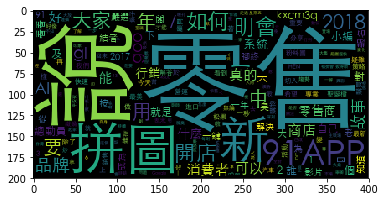

In [85]:
#抓取電腦內的文字的路徑
font = r"/System/Library/Fonts/STHeiti Light.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)